In [3]:
trainingDataset=read.csv('CoinDesk_Data/BTC_all.csv')
head(trainingDataset)

,Currency,Date,Closing.Price..USD.,X24h.Open..USD.,X24h.High..USD.,X24h.Low..USD.
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,BTC,2013-10-01,123.6550,124.3047,124.7517,122.56349
2,BTC,2013-10-02,125.4550,123.6550,125.7585,123.63383
3,BTC,2013-10-03,108.5848,125.4550,125.6657,83.32833
4,BTC,2013-10-04,118.6747,108.5848,118.6750,107.05816
5,BTC,2013-10-05,121.3387,118.6747,121.9363,118.00566
6,BTC,2013-10-06,120.6553,121.3387,121.8522,120.55450


In [4]:
cols=colnames(trainingDataset)

In [5]:
print(cols)

[1] "Currency"            "Date"                "Closing.Price..USD."
[4] "X24h.Open..USD."     "X24h.High..USD."     "X24h.Low..USD."     


In [6]:
colnames(trainingDataset)=c("index","date","close","open","high","low")
head(trainingDataset)

,index,date,close,open,high,low
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,BTC,2013-10-01,123.6550,124.3047,124.7517,122.56349
2,BTC,2013-10-02,125.4550,123.6550,125.7585,123.63383
3,BTC,2013-10-03,108.5848,125.4550,125.6657,83.32833
4,BTC,2013-10-04,118.6747,108.5848,118.6750,107.05816
5,BTC,2013-10-05,121.3387,118.6747,121.9363,118.00566
6,BTC,2013-10-06,120.6553,121.3387,121.8522,120.55450


In [7]:
trainingDataset->data

In [8]:
pkg.exists=function(pkg.name){
    s=find.package(pkg.name,quiet=TRUE)
    if(identical(s,character(0)))return(FALSE) else return(TRUE)
}

In [9]:
find.package('anytime',verbose=TRUE)

[1] "/home/praneetshekhar/R/x86_64-pc-linux-gnu-library/4.0/anytime"

In [10]:
packages.required=list('anytime','xts','forecast','hts')
for(pkg in packages.required){
    if(pkg.exists(pkg)){library(pkg,character.only=TRUE)}else{install.packages(pkg);library(pkg,character.only=TRUE)}
    print(find.package(pkg,verbose=TRUE))
    }

[1] "/home/praneetshekhar/R/x86_64-pc-linux-gnu-library/4.0/anytime"


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




[1] "/home/praneetshekhar/R/x86_64-pc-linux-gnu-library/4.0/xts"


Installing package into ‘/home/praneetshekhar/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘curl’, ‘quantmod’, ‘tseries’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "/home/praneetshekhar/R/x86_64-pc-linux-gnu-library/4.0/forecast"


Installing package into ‘/home/praneetshekhar/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



[1] "/home/praneetshekhar/R/x86_64-pc-linux-gnu-library/4.0/hts"


In [11]:
summary(data)

    index               date               close              open        
 Length:2783        Length:2783        Min.   :  108.6   Min.   :  108.6  
 Class :character   Class :character   1st Qu.:  459.4   1st Qu.:  458.8  
 Mode  :character   Mode  :character   Median : 2768.8   Median : 2763.3  
                                       Mean   : 6487.8   Mean   : 6469.2  
                                       3rd Qu.: 8486.0   3rd Qu.: 8474.1  
                                       Max.   :63346.8   Max.   :63562.7  
      high              low          
 Min.   :  118.7   Min.   :   83.33  
 1st Qu.:  468.9   1st Qu.:  450.55  
 Median : 2836.4   Median : 2682.87  
 Mean   : 6664.6   Mean   : 6261.39  
 3rd Qu.: 8757.4   3rd Qu.: 8217.42  
 Max.   :64801.8   Max.   :62094.63  

In [12]:
data$date=as.Date(anytime(data$date))
head(data)

,index,date,close,open,high,low
,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,BTC,2013-09-30,123.6550,124.3047,124.7517,122.56349
2,BTC,2013-10-01,125.4550,123.6550,125.7585,123.63383
3,BTC,2013-10-02,108.5848,125.4550,125.6657,83.32833
4,BTC,2013-10-03,118.6747,108.5848,118.6750,107.05816
5,BTC,2013-10-04,121.3387,118.6747,121.9363,118.00566
6,BTC,2013-10-05,120.6553,121.3387,121.8522,120.55450


In [15]:
#removing index column since it's unnecessary
#we're only testing this for BTC at the moment
data[c("index")]=list(NULL)

In [16]:
head(data)

,date,close,open,high,low
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013-09-30,123.6550,124.3047,124.7517,122.56349
2,2013-10-01,125.4550,123.6550,125.7585,123.63383
3,2013-10-02,108.5848,125.4550,125.6657,83.32833
4,2013-10-03,118.6747,108.5848,118.6750,107.05816
5,2013-10-04,121.3387,118.6747,121.9363,118.00566
6,2013-10-05,120.6553,121.3387,121.8522,120.55450


In [18]:
#converting to Time Series 
data=xts(data[,-1],order.by=as.POSIXct(data$date))
head(data)

                       close     open     high       low
2013-09-30 05:30:00 123.6550 124.3047 124.7517 122.56349
2013-10-01 05:30:00 125.4550 123.6550 125.7585 123.63383
2013-10-02 05:30:00 108.5848 125.4550 125.6657  83.32833
2013-10-03 05:30:00 118.6747 108.5848 118.6750 107.05816
2013-10-04 05:30:00 121.3387 118.6747 121.9363 118.00566
2013-10-05 05:30:00 120.6553 121.3387 121.8522 120.55450

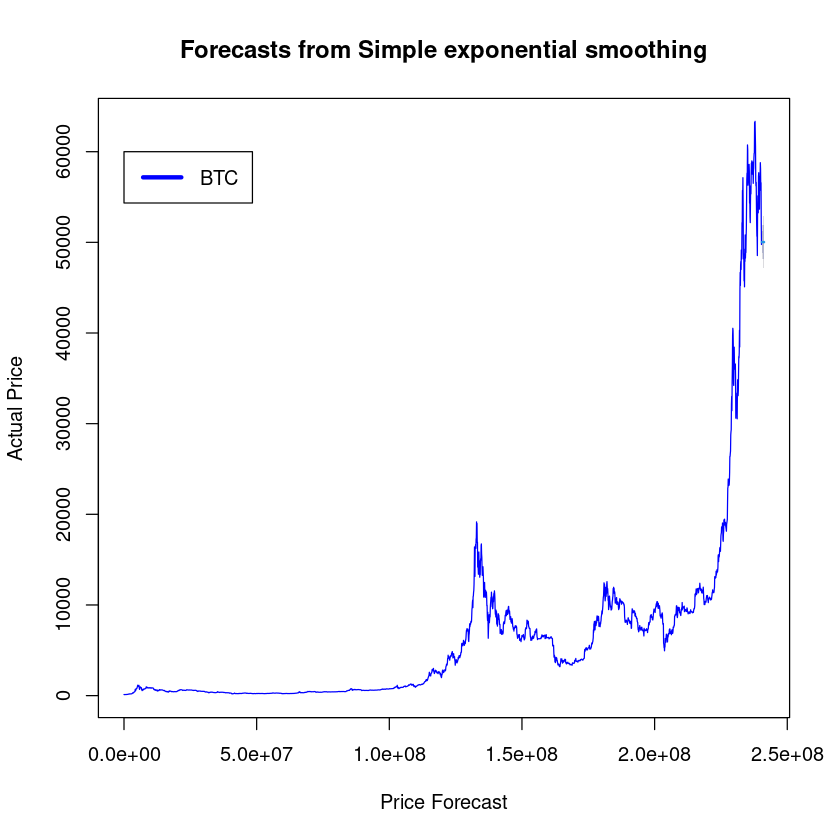

In [36]:
# Now we start with the different training models

# Exponential Smoothing
plot(ses(data[,"close"]),xlab="Price Forecast",ylab="Actual Price",col="blue")
legend(x=0.0e+05,y=60000,"BTC",lwd=3.5,col='blue') # plot simple exponential smoothing

In [22]:
# # "" for my reference => error/loss measure used: MAPE, LSTM RNN as it stores/has memory
print("But SES does not factor in trends in data and seasonality, although the latter is not relevant here. So we'll look for better methods")

[1] "But SES does not factor in trends in data and seasonality, although the latter is not relevant here. So we'll look for better methods"


In [25]:
print("Using Holt's method and ETS method as they consider trend,seasonlity too. ETS has better error correction")
hlt=holt(data[,'close'])
print(hlt)

[1] "Using Holt's method and ETS method as they consider trend,seasonlity too. ETS has better error correction"
          Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
240451201       50114.38 49437.66 50791.10 49079.42 51149.34
240537601       50199.28 49256.55 51142.02 48757.49 51641.07
240624001       50284.18 49134.18 51434.18 48525.41 52042.96
240710401       50369.08 49042.73 51695.44 48340.59 52397.57
240796801       50453.98 48971.11 51936.86 48186.12 52721.85
240883201       50538.89 48913.58 52164.19 48053.20 53024.57
240969601       50623.79 48866.72 52380.85 47936.58 53310.99
241056001       50708.69 48828.27 52589.11 47832.84 53584.54
241142401       50793.59 48796.67 52790.51 47739.57 53847.61
241228801       50878.49 48770.79 52986.19 47655.04 54101.94


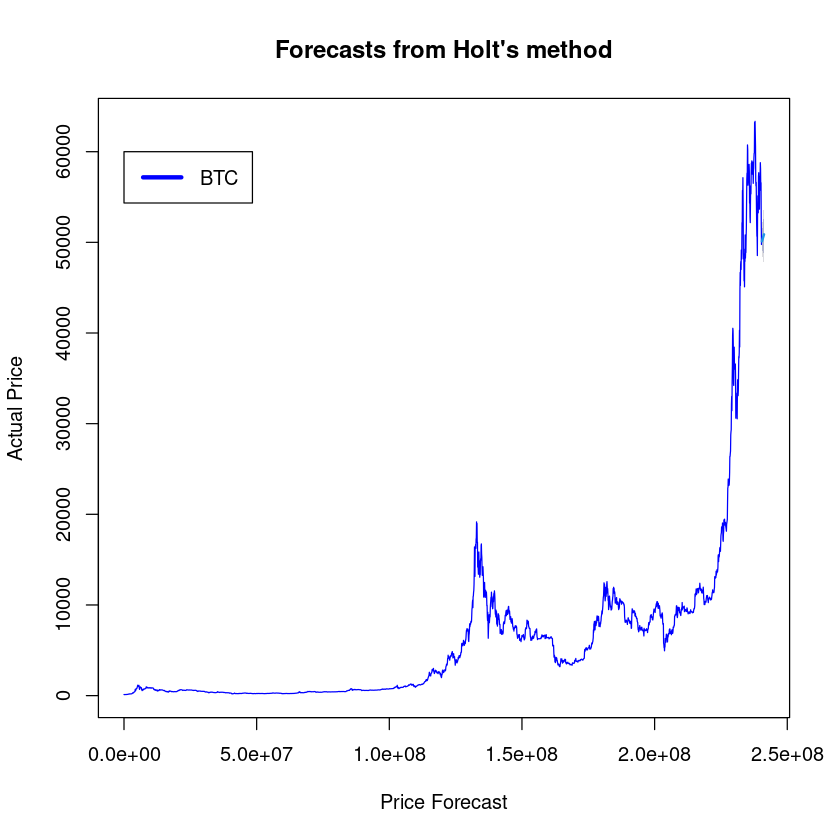

In [37]:
# plotting the above data
plot(hlt,xlab="Price Forecast",ylab="Actual Price",col="blue")
legend(x=0.0e+05,y=60000,"BTC",lwd=3.5,col='blue')

In [28]:
# as we can see they still give similar results, so ETS
ETS=forecast(data[,"close"])
print(ETS)
cat("Error Trends Seasonal")

          Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
240451201       50124.64 47399.16 52850.12 45956.37 54292.90
240537601       50219.30 46421.17 54017.42 44410.56 56028.03
240624001       50313.96 45670.02 54957.89 43211.66 57416.25
240710401       50408.61 45037.29 55779.94 42193.88 58623.34
240796801       50503.27 44479.80 56526.75 41291.16 59715.38
240883201       50597.93 43975.15 57220.71 40469.26 60726.60
240969601       50692.59 43509.98 57875.19 39707.74 61677.43
241056001       50787.25 43075.59 58498.90 38993.29 62581.20
241142401       50881.90 42665.93 59097.88 38316.65 63447.16
241228801       50976.56 42276.58 59676.54 37671.09 64282.03
Error Trends Seasonal

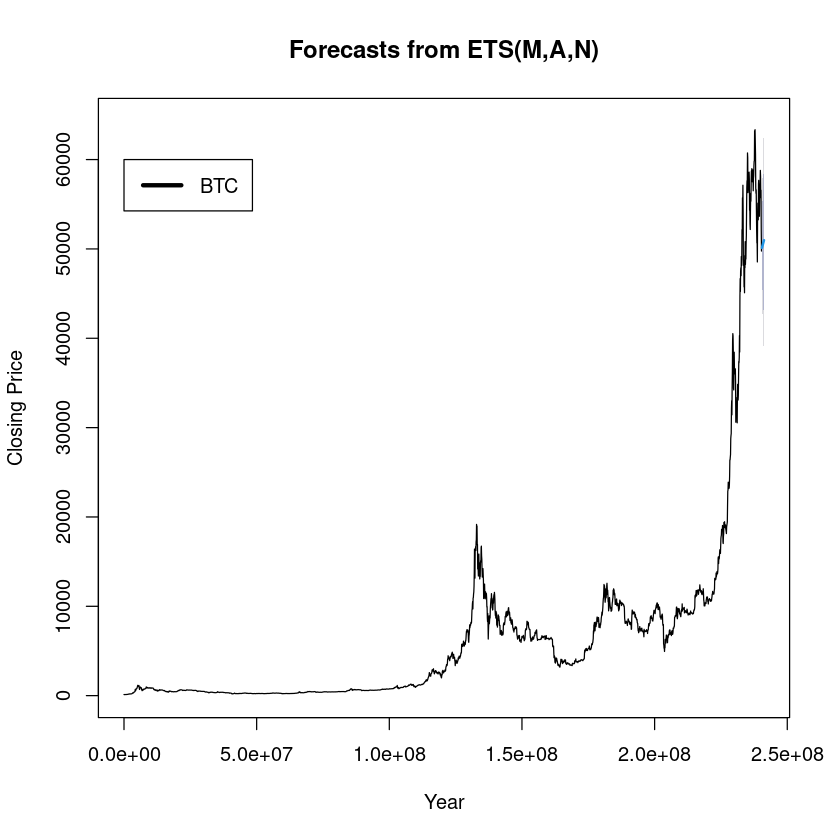

In [47]:
plot(ETS,xlab="Year",ylab="Closing Price")
legend(x=0.0e+05,y=60000,"BTC",lwd=3.5,col=1)

In [30]:
print("Creating the actual model now...")
# linear model
#scaling values
data
model=step(lm(close~open+high+low,data=data))
print("Checking fitted model...")

[1] "Creating the actual model now..."
Start:  AIC=30020.07
close ~ open + high + low

       Df Sum of Sq       RSS   AIC
<none>              134269054 30020
- open  1  50041192 184310246 30900
- low   1 160535806 294804860 32207
- high  1 228712054 362981108 32786
[1] "Checking fitted model..."


In [31]:
summary(model)


Call:
lm(formula = close ~ open + high + low, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2521.04    -4.74     4.54    19.91  2440.17 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.35784    4.86682   -0.69     0.49    
open        -0.42178    0.01311  -32.18   <2e-16 ***
high         0.84178    0.01223   68.80   <2e-16 ***
low          0.57649    0.01000   57.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 219.8 on 2779 degrees of freedom
Multiple R-squared:  0.9996,	Adjusted R-squared:  0.9996 
F-statistic: 2.246e+06 on 3 and 2779 DF,  p-value: < 2.2e-16


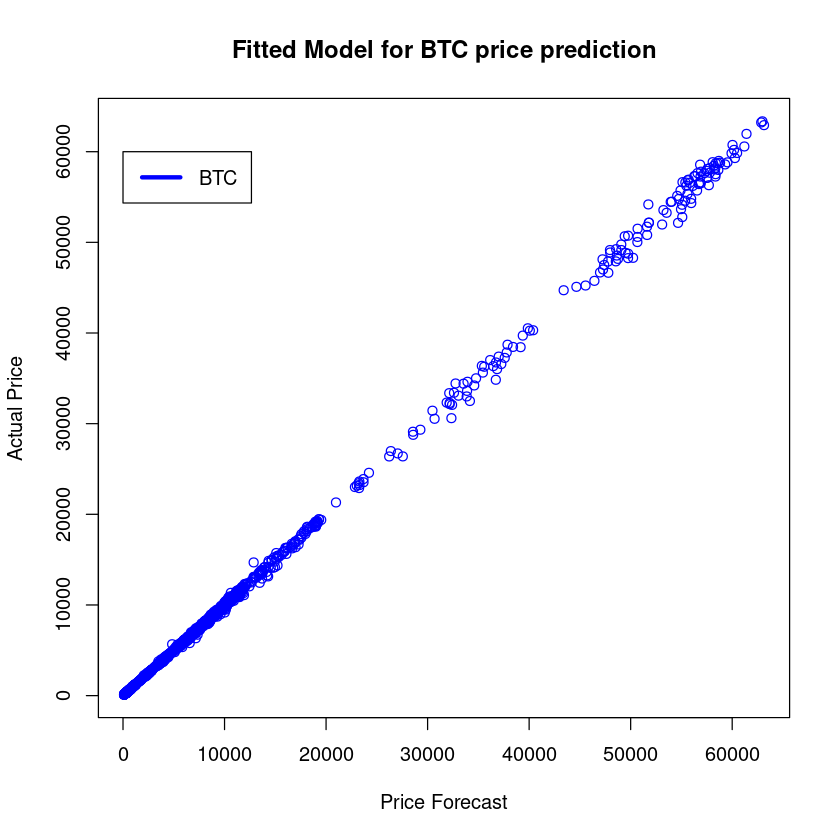

In [44]:
plot(fitted(model),data$close,xlab="Price Forecast",ylab="Actual Price",col="blue",main="Fitted Model for BTC price prediction")
#lines(close~open+high+low)
legend(x=0.0e+05,y=60000,"BTC",lwd=3.5,col='blue')

In [45]:
modelHolt= HoltWinters(data[,'close'], gamma = FALSE)

Warning message in HoltWinters(data[, "close"], gamma = FALSE):
“optimization difficulties: ERROR: ABNORMAL_TERMINATION_IN_LNSRCH”


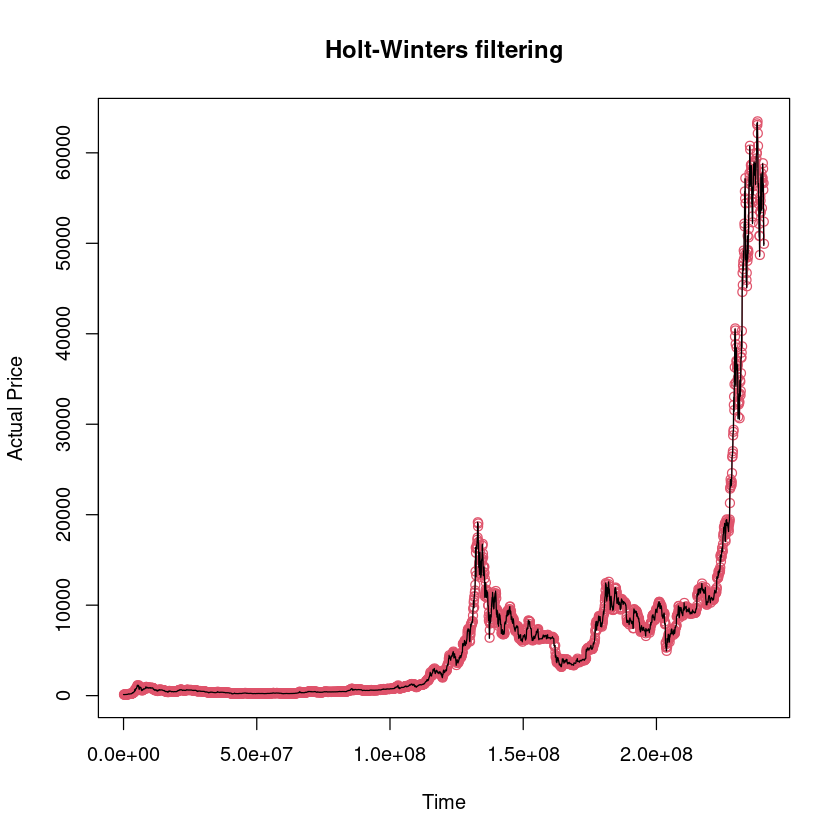

In [48]:
plot(modelHolt, type="o", ylab="Actual Price", xlab="Time")

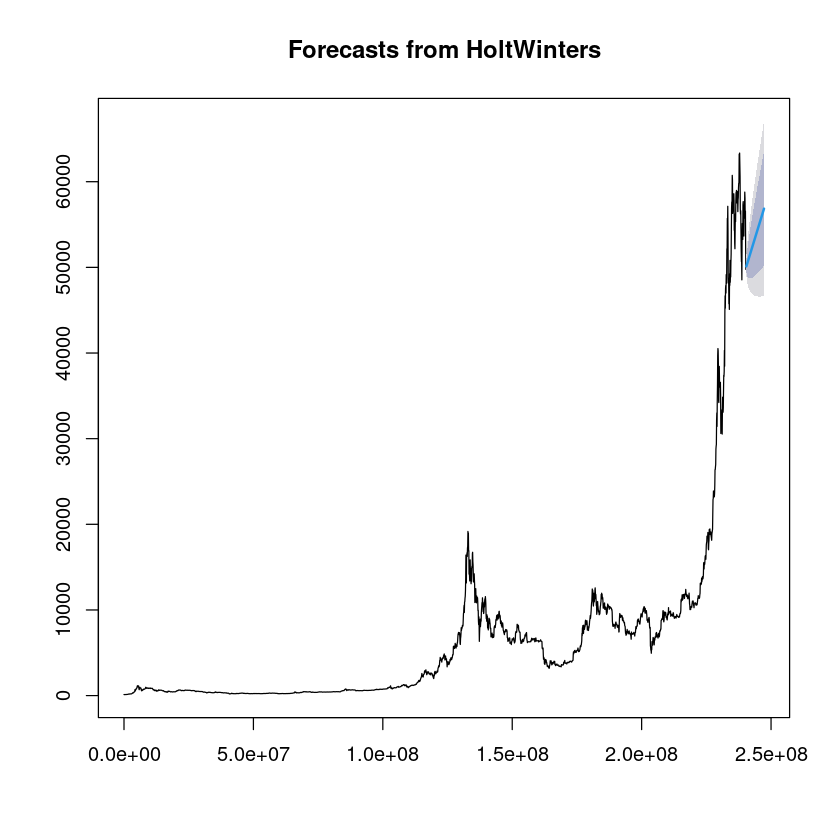

In [49]:
plot(forecast(modelHolt,h=80))

### 